In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv('PUIDATA')

'/home/cusp/lag552/PUIdata'

## Importing the Data

In [3]:
os.system("curl -O https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv")
os.system("mv rows.csv " + os.getenv("PUIDATA"))

0

In [4]:
nrg = gp.GeoDataFrame.from_csv(os.getenv('PUIDATA') + '/' + 'rows.csv')

In [5]:
nrg.head()

,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
Record Number,,,,,,,,,,,,,,,,,,,,,
12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,NaN,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,NaN,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,NaN,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


In [6]:
nrg.columns

Index(['NYC Borough, Block, and Lot (BBL)', 'Co-reported BBL Status',
       'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'],
      dtype='object')

In [7]:
!curl -O "http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.6M  100 11.6M    0     0  6172k      0  0:00:01  0:00:01 --:--:-- 6193k


In [8]:
os.system("curl -O http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip")
os.system("mv mn_mappluto_16v1.zip " + os.getenv("PUIDATA"))

0

In [9]:
os.system("unzip " + os.getenv('PUIDATA') + '/' + "mn_mappluto_16v1.zip")

256

In [10]:
bsize = gp.GeoDataFrame.from_file('MNMapPLUTO.shp')

In [11]:
bsize.head()

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1592 2 AVENUE,C1-9/TA,None,2,468000.0,1435950.0,1.015450e+09,10885,...,0,1920,None,10028,C1-9,None,None,None,9a,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,1.007230e+09,11/30/2006,263 9 AVENUE,C1-5/R8,None,2,539984.0,11879993.0,1.007238e+09,89203,...,0,1914,None,10001,R8,None,None,None,8d,"POLYGON ((984164.5626000017 211846.0703999996,..."
2,0.000000e+00,None,310 EAST 109 STREET,R7A,None,2,140102.0,343271.0,1.016800e+09,12000,...,0,1910,None,10029,R7A,None,None,None,6b,"POLYGON ((1000742.195800006 227910.6640000045,..."
3,0.000000e+00,None,720 PARK AVENUE,R10/PI/LH-1A,R8B,2,5040000.0,30591900.0,1.013850e+09,203490,...,2006,1928,None,10021,R10,R8B,None,None,8c,"POLYGON ((994007.6886000037 219880.428399995, ..."
4,0.000000e+00,None,3 WEST 83 STREET,R8B,R10A,2,437850.0,1267200.0,1.011970e+09,13839,...,0,1900,None,10024,R8B,R10A,None,None,5d,"POLYGON ((992273.6850000024 224863.4904000014,..."


In [12]:
bsize.columns

Index(['APPBBL', 'APPDate', 'Address', 'AllZoning1', 'AllZoning2',
       'AreaSource', 'AssessLand', 'AssessTot', 'BBL', 'BldgArea', 'BldgClass',
       'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode',
       'BuiltCode', 'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR',
       'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand',
       'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea',
       'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot',
       'LotArea', 'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1',
       'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct',
       'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea', 'SHAPE_Area',
       'SHAPE_Leng', 'SPDist1', 'SPDist2', 'Sanborn', 'SanitBoro', 'SanitDist',
       'SanitSub', 'SchoolDist', 'SplitZone', 'StrgeArea', 'TaxMap',
       'Tract2010', 'UnitsRe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2286ffba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe2280ae780>]], dtype=object)

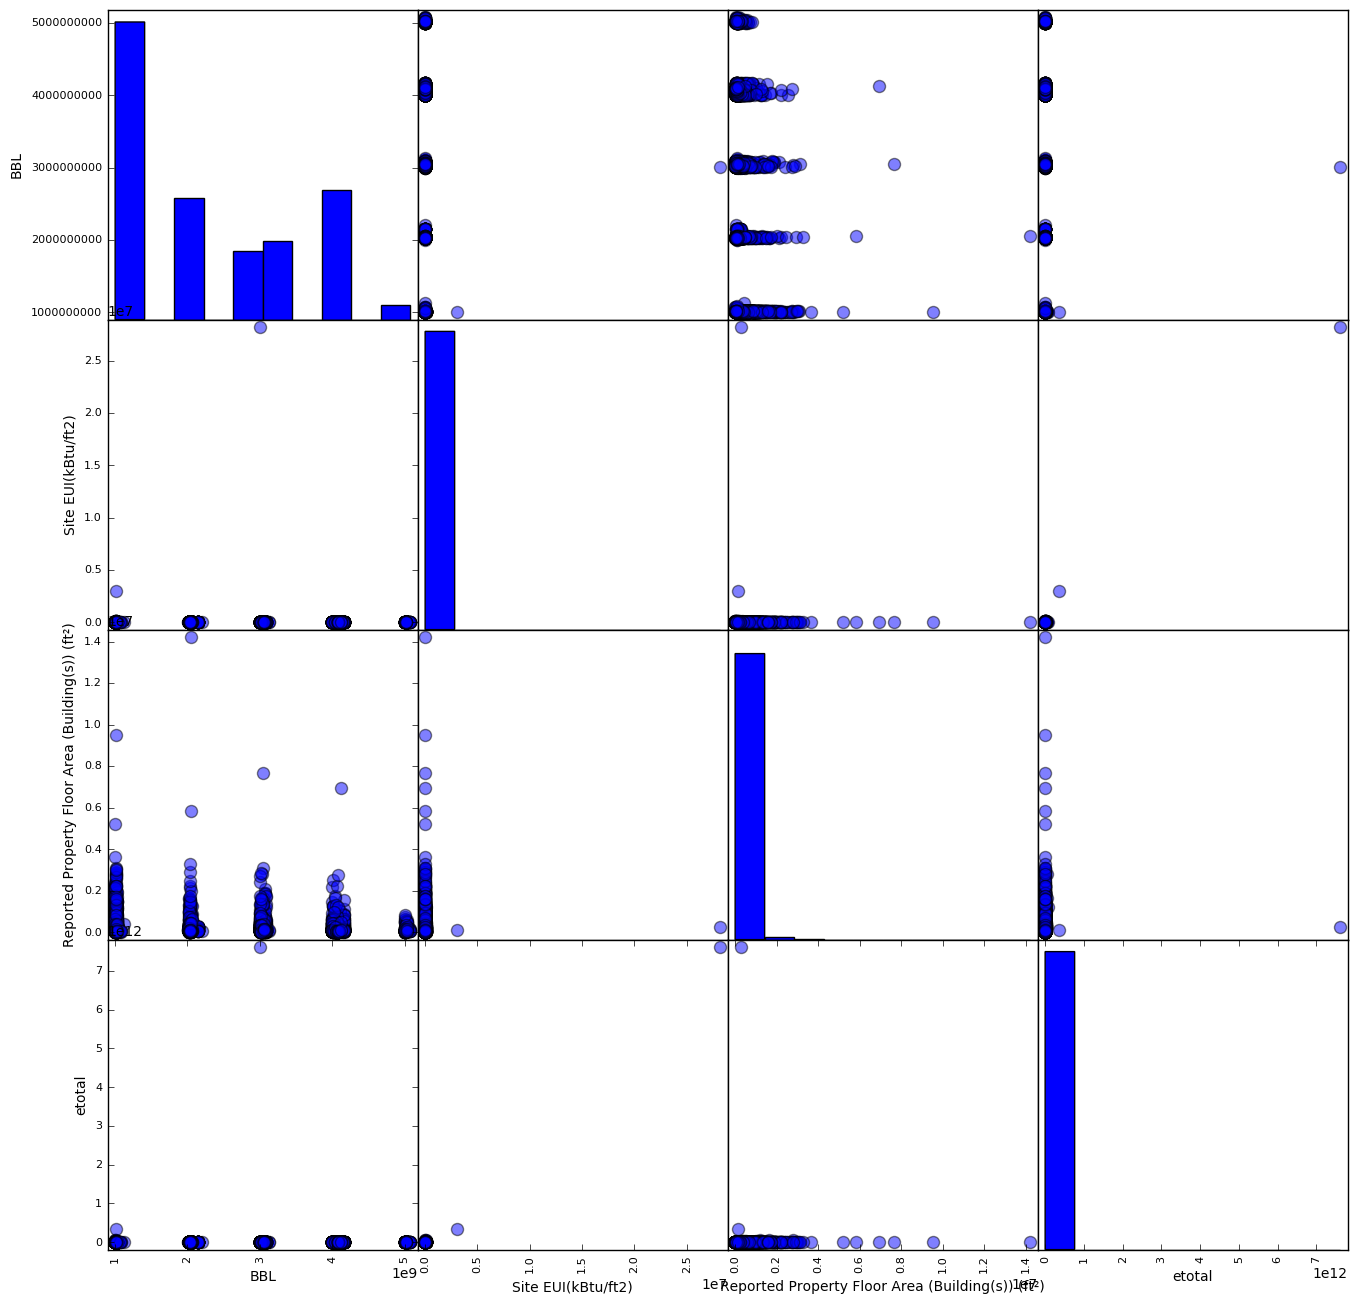

In [121]:
scatter_matrix (nrg, s=300, figsize=(16, 16))

### Caption: 
The above scatter plot compares BBL, Energy per sq. foot, Building floor area, and total energy against one another. No clear patterns are visible when viewing the data this way.

## Data Wrangling

In [14]:
nrg.drop(['Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status', 'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'], axis = 1, inplace = True)

In [15]:
nrg.head()

,"NYC Borough, Block, and Lot (BBL)",Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
Record Number,,,
12086,1.000410e+09,NaN,918919
14354,4.021460e+09,NaN,NaN
12150,2.027620e+09,NaN,64200
12590,1.006700e+09,NaN,NaN
15591,2.048300e+09,NaN,50000


In [16]:
bsize.drop(['APPBBL', 'APPDate', 'Address', 'AllZoning1', 'AllZoning2',
       'AreaSource', 'AssessLand', 'AssessTot', 'BldgArea', 'BldgClass',
       'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode',
       'BuiltCode', 'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR',
       'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand',
       'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea',
       'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot',
       'LotArea', 'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1',
       'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct',
       'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea', 'SHAPE_Area',
       'SHAPE_Leng', 'SPDist1', 'SPDist2', 'Sanborn', 'SanitBoro', 'SanitDist',
       'SanitSub', 'SchoolDist', 'SplitZone', 'StrgeArea', 'TaxMap',
       'Tract2010', 'Version', 'XCoord', 'YCoord',
       'YearAlter1', 'YearAlter2', 'YearBuilt', 'ZMCode', 'ZipCode',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'ZoneMap',
       'geometry'], axis = 1, inplace = True)

In [17]:
bsize.head()

,BBL,UnitsRes,UnitsTotal
0,1.015450e+09,16,18
1,1.007238e+09,50,50
2,1.016800e+09,10,10
3,1.013850e+09,29,32
4,1.011970e+09,26,26


In [18]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

indx = (np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)']))
print("True entries %d"%sum(indx))
nrg['Site EUI(kBtu/ft2)'][~indx] = float('NaN')

indx2 = (np.vectorize(canconvert)(nrg['Reported Property Floor Area (Building(s)) (ft²)']))
print("True entries %d"%sum(indx))
nrg['Reported Property Floor Area (Building(s)) (ft²)'][~indx2] = float('NaN')

indx3 = (np.vectorize(canconvert)(nrg['NYC Borough, Block, and Lot (BBL)']))
print("True entries %d"%sum(indx))
nrg['NYC Borough, Block, and Lot (BBL)'][~indx3] = float('NaN')

True entries 15513
True entries 15513


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


True entries 15513


In [19]:
nrg['Site EUI(kBtu/ft2)'] = nrg['Site EUI(kBtu/ft2)'].convert_objects(convert_numeric=True)
nrg['Reported Property Floor Area (Building(s)) (ft²)'] = nrg['Reported Property Floor Area (Building(s)) (ft²)'].convert_objects(convert_numeric=True)
nrg['NYC Borough, Block, and Lot (BBL)'] = nrg['NYC Borough, Block, and Lot (BBL)'].convert_objects(convert_numeric=True)
print(np.dtype(nrg['Site EUI(kBtu/ft2)']))
print(np.dtype(nrg['Reported Property Floor Area (Building(s)) (ft²)']))

float64
float64


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [20]:
bsize = bsize[bsize['UnitsTotal']>10]
bsize.head()

,BBL,UnitsRes,UnitsTotal
0,1.015450e+09,16,18
1,1.007238e+09,50,50
3,1.013850e+09,29,32
4,1.011970e+09,26,26
8,1.022240e+09,30,30


In [21]:
nrg = nrg.rename(columns = {'NYC Borough, Block, and Lot (BBL)' : 'BBL'})
nrg.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
Record Number,,,
12086,1.000410e+09,NaN,918919.0
14354,4.021460e+09,NaN,NaN
12150,2.027620e+09,NaN,64200.0
12590,1.006700e+09,NaN,NaN
15591,2.048300e+09,NaN,50000.0


In [22]:
print(np.dtype(nrg['Site EUI(kBtu/ft2)']))

float64


In [23]:
print(np.dtype(nrg['Reported Property Floor Area (Building(s)) (ft²)']))

float64


In [24]:
nrg['etotal'] = nrg['Site EUI(kBtu/ft2)'] * nrg['Reported Property Floor Area (Building(s)) (ft²)']

In [25]:
bblnrgdata = pd.merge(nrg, bsize, on='BBL')
bblnrgdata.head()
print(len(bblnrgdata))
bblnrgdata = bblnrgdata.dropna()
print(len(bblnrgdata))

5201
4266


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe229d02da0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe2293372b0>]], dtype=object)

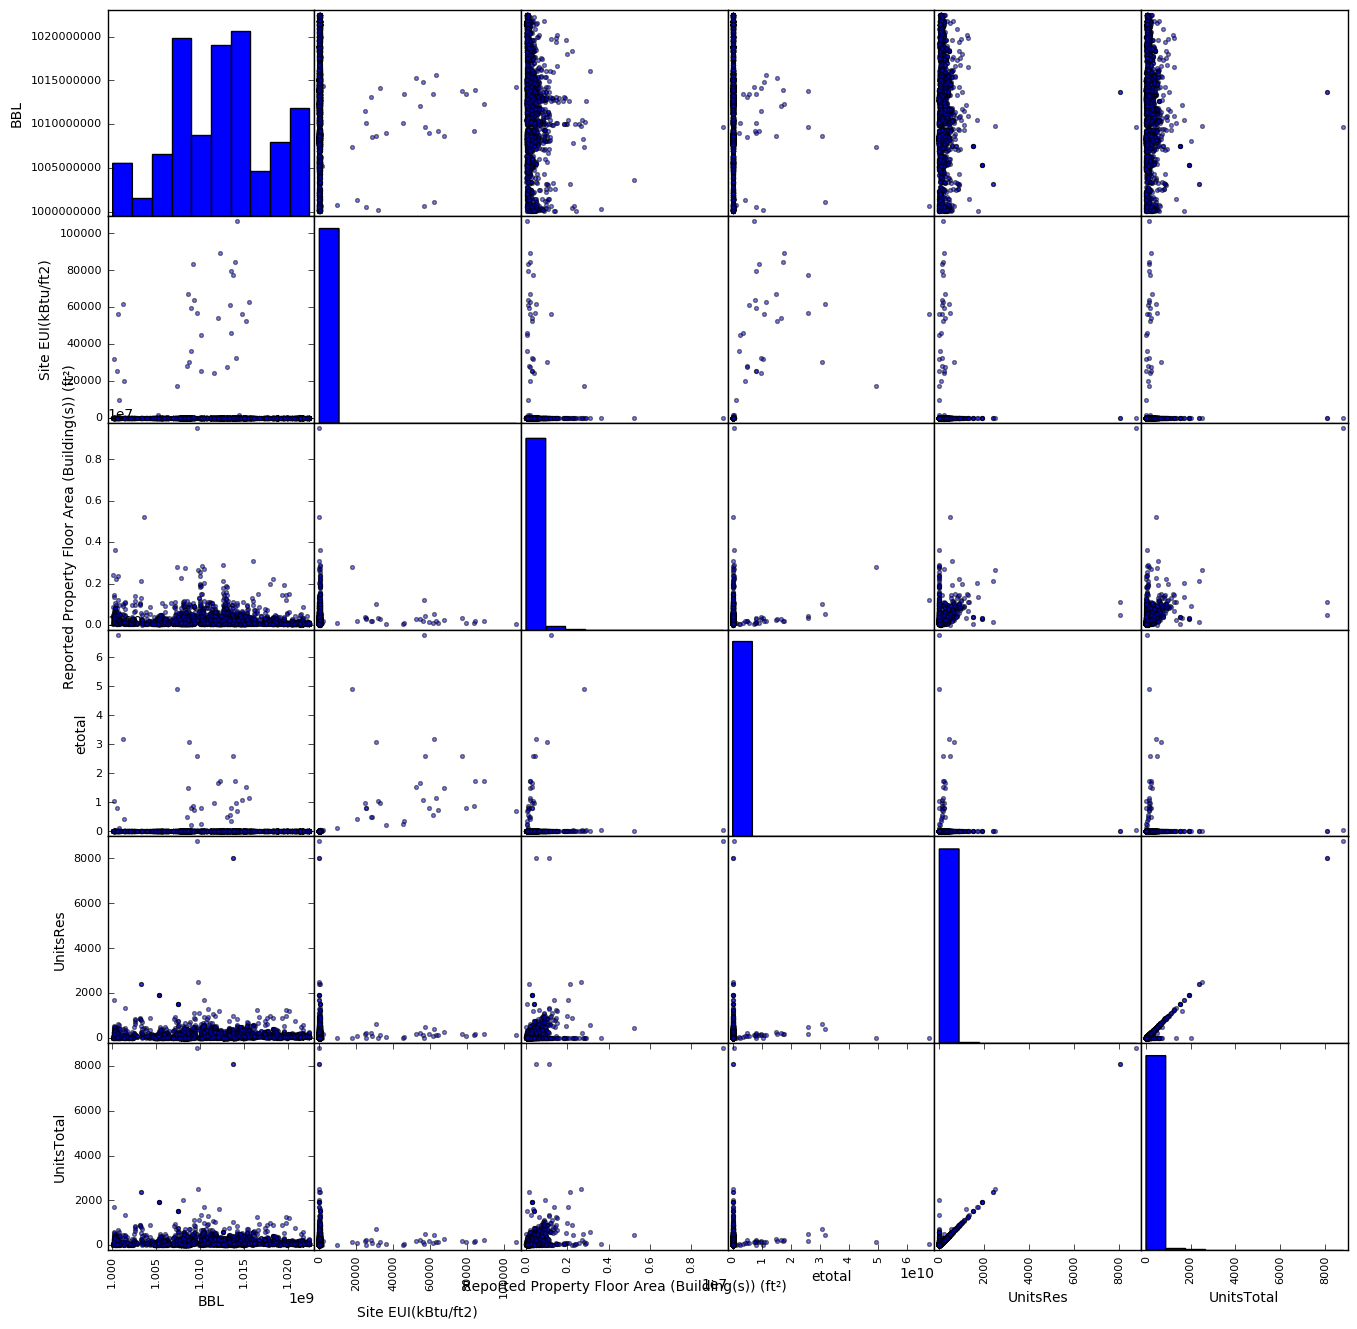

In [26]:
scatter_matrix (bblnrgdata, s=30, figsize=(16, 16))

### Caption 
The above scatter matrix compares BBL, energy per sq. foot, floor area, total energy, residential units and total units. There is a clear visual correlation between both residential and total units comared to one another (as expected), but otherwise no obvious correlations appear.

## Plots

In [27]:
np.dtype(bblnrgdata['UnitsTotal'])

dtype('int64')

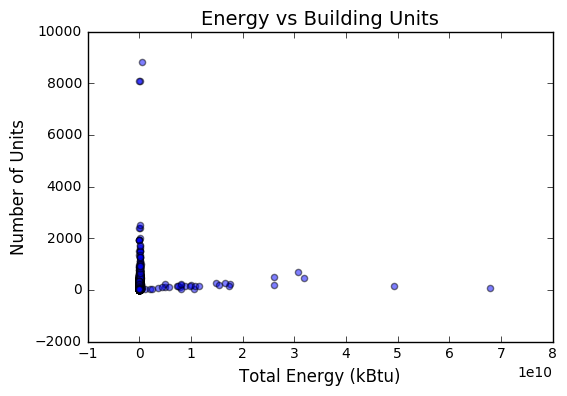

In [28]:
pl.scatter(x=bblnrgdata['etotal'], y=bblnrgdata['UnitsTotal'],alpha=0.5)
pl.title('Energy vs Building Units', fontsize=14)
pl.xlabel('Total Energy (kBtu)', fontsize=12)
pl.ylabel('Number of Units', fontsize=12)
pl.show()

### Caption:
The above figure compared the total energy consumed vs. the number of units. Each dot represents a building's data. This data contains obvious outliers.

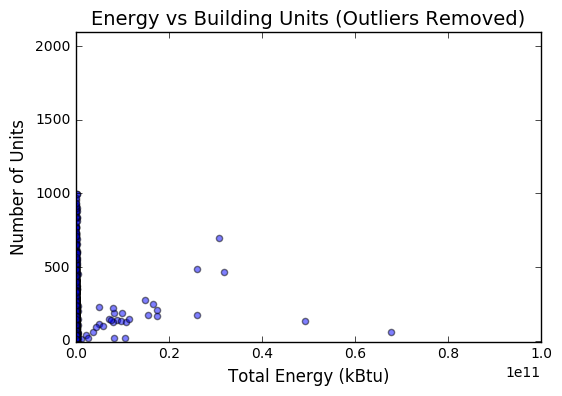

In [41]:
pl.scatter(x=bblnrgdata['etotal'], y=bblnrgdata['UnitsTotal'],alpha=0.5)
pl.axis([-5, 1e11, -5, 2100])
pl.title('Energy vs Building Units (Outliers Removed)', fontsize=14)
pl.xlabel('Total Energy (kBtu)', fontsize=12)
pl.ylabel('Number of Units', fontsize=12)
pl.show()

### Caption:
The above figure compared the total energy consumed vs. the number of units. Each dot represents a building's data. This data has removed the outliers.

## Log Plots

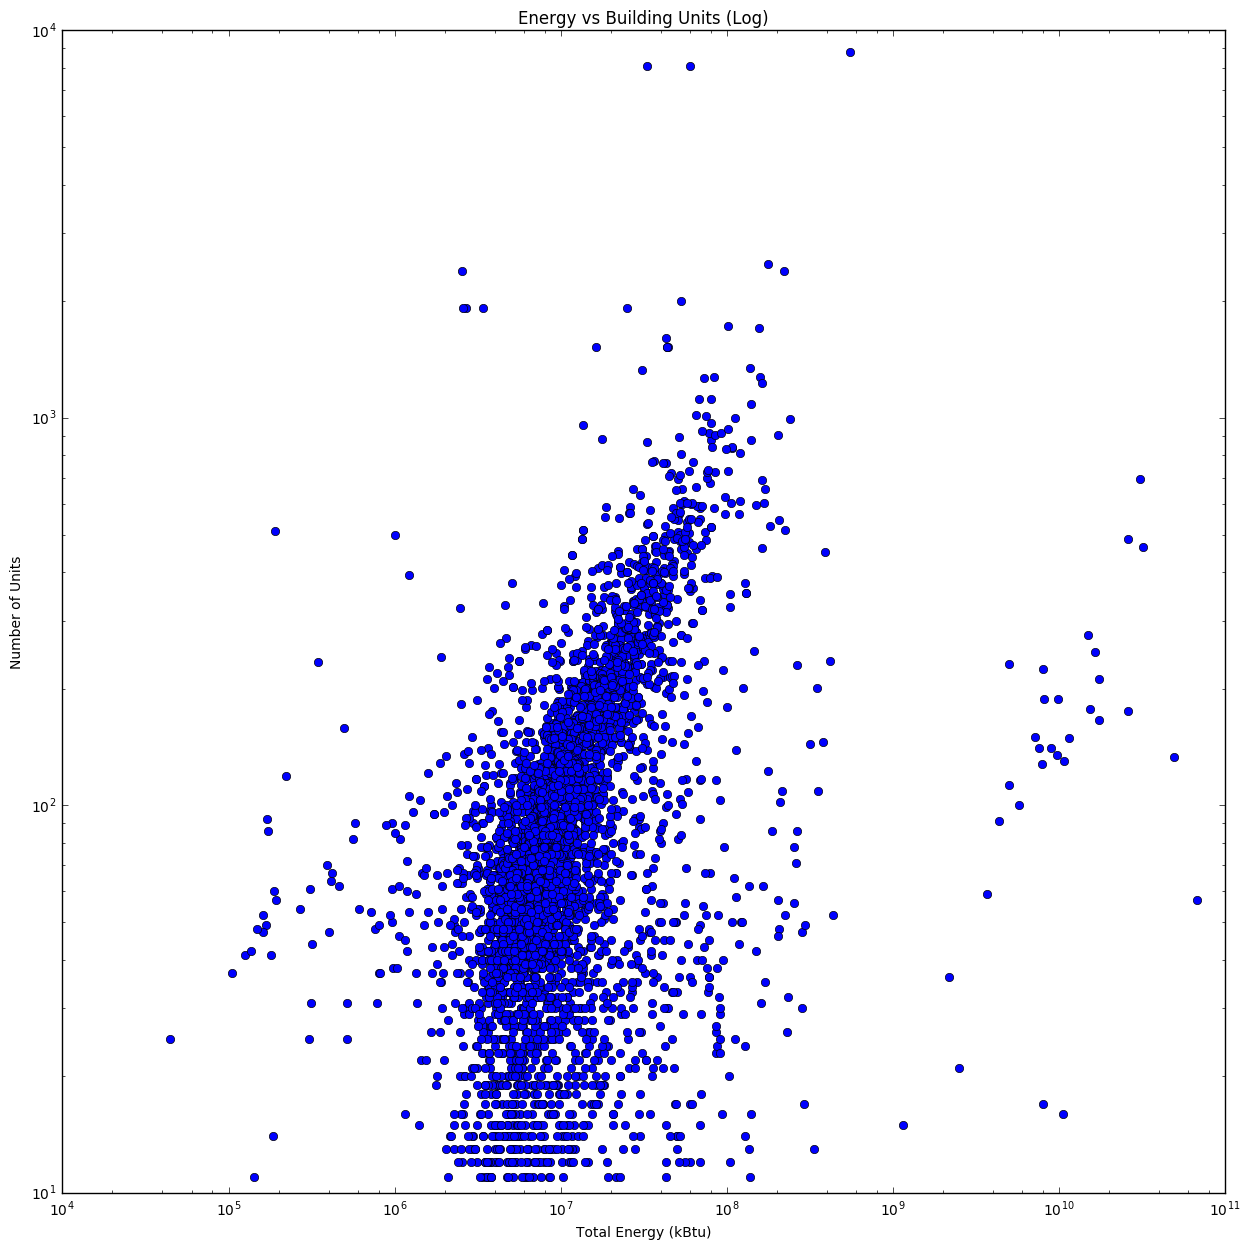

In [30]:
plt.figure(figsize=(15,15))
plt.loglog(bblnrgdata['etotal'], bblnrgdata['UnitsTotal'], 'o')
plt.xlim([10**4, 10**11])
plt.xlabel('Total Energy (kBtu)')
plt.ylabel('Number of Units')
plt.title("Energy vs Building Units (Log)")

### Caption:
The above figure shows the log plot of total energy consumed vs. the number of units. Each dot represents a building's data.

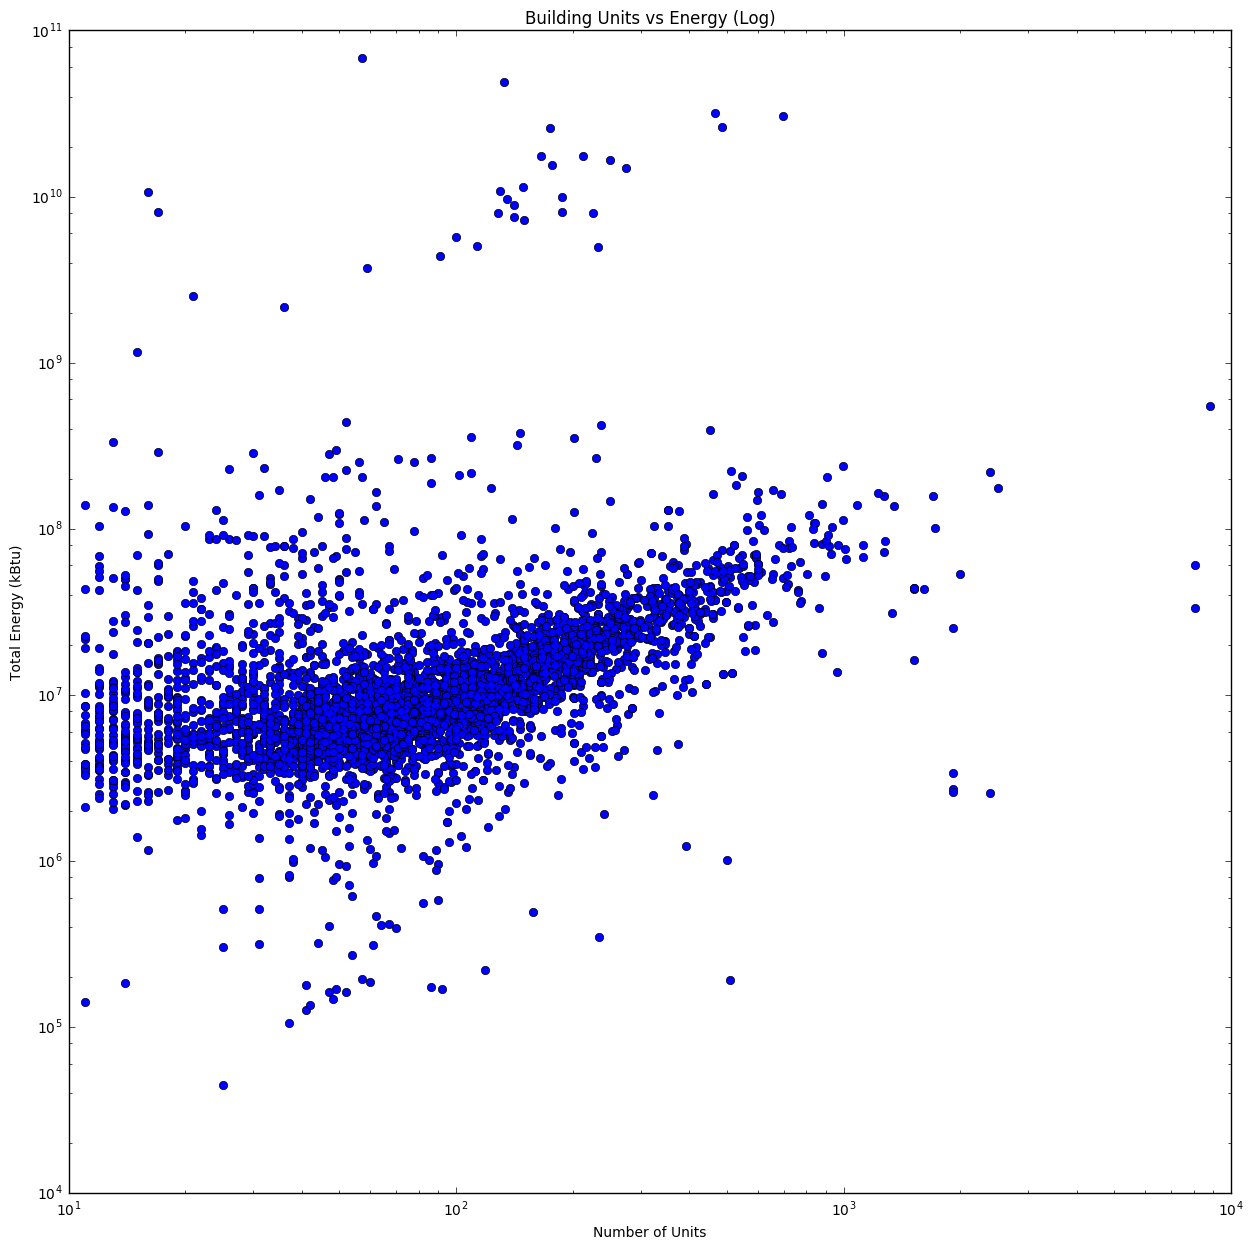

In [31]:
plt.figure(figsize=(15,15))
plt.loglog(bblnrgdata['UnitsTotal'], bblnrgdata['etotal'], 'o')
plt.ylim([10**4, 10**11])
plt.ylabel("Total Energy (kBtu)")
plt.xlabel("Number of Units")
plt.title("Building Units vs Energy (Log)")

### Caption:
The above figure shows the log plot of the number of units vs total energy consumed. Each dot represents a building's data.

In [32]:
bblnrgdata = bblnrgdata[bblnrgdata.UnitsTotal<1000]
print(len(bblnrgdata))

4237


In [33]:
bsize_1 = np.log10(bblnrgdata['UnitsTotal'])
nrg_1 = sm.add_constant(np.log10(bblnrgdata['etotal']))

In [34]:
linmodel_1 = sm.OLS(bsize_1, nrg_1, missing='drop')
results_1 = linmodel_1.fit()

[ 2.08517416  2.08931687  1.97535623 ...,  2.09071665  2.02077764
  2.02577256]


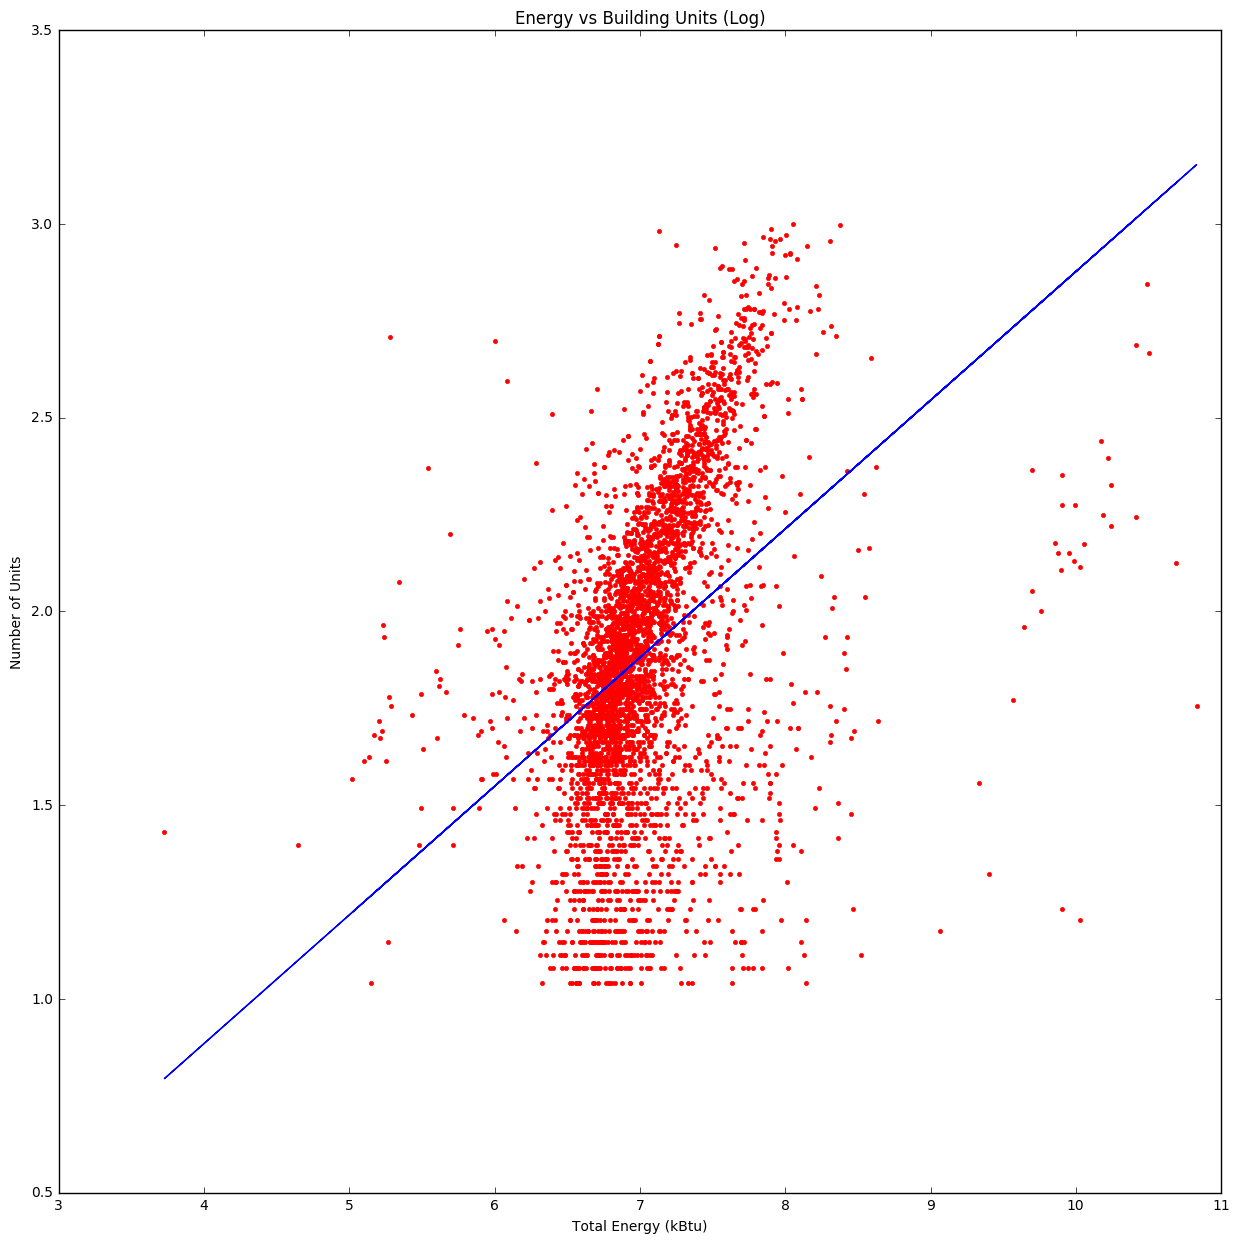

In [80]:
plt.figure(figsize=(15,15))
y = np.log10(bblnrgdata['UnitsTotal'])
X = sm.add_constant(np.log10(bblnrgdata['etotal']))
linmodel_eu = sm.OLS(y, X).fit()
print(linmodel_eu.predict(X))
pl.plot(np.log10(bblnrgdata['etotal']), np.log10(bblnrgdata['UnitsTotal']), 'r.')
pl.plot(np.log10(bblnrgdata['etotal']), linmodel_ue.predict(X), '-')
plt.xlabel("Total Energy (kBtu)")
plt.ylabel("Number of Units")
plt.title("Energy vs Building Units (Log)")

### Caption:
The above figure shows the log plot of total energy consumed vs. the number of units, now with a best fit linear line. Each dot represents a building's data.

In [36]:
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:             UnitsTotal   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     848.0
Date:                Wed, 19 Oct 2016   Prob (F-statistic):          4.23e-170
Time:                        14:52:54   Log-Likelihood:                -1654.9
No. Observations:                4237   AIC:                             3314.
Df Residuals:                    4235   BIC:                             3326.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.4441      0.080     -5.526      0.0

In [37]:
bsize2 = sm.add_constant(np.log10(bblnrgdata['UnitsTotal']))
nrg3 = np.log10(bblnrgdata['etotal'])

In [38]:
linmodel_2 = sm.OLS(nrg3, bsize2, missing='drop')
results_2 = linmodel_2.fit()

[ 6.95953147  6.7746521   6.7746521  ...,  6.67209787  6.88058932
  6.65704371]


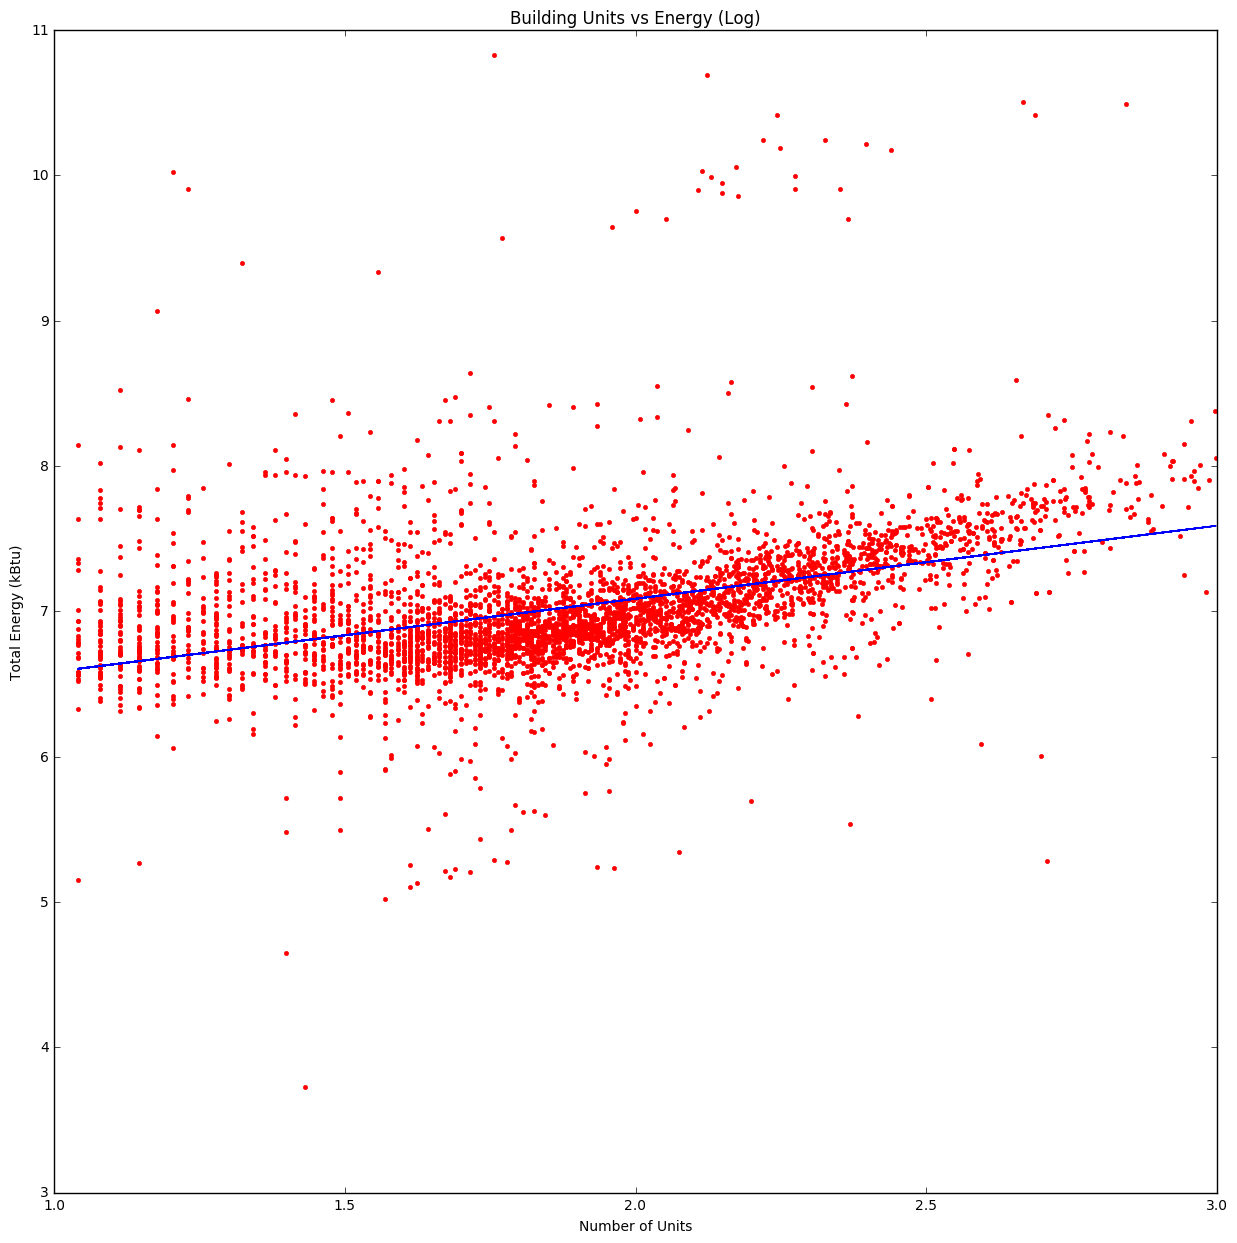

In [82]:
plt.figure(figsize=(15,15))
y = np.log10(bblnrgdata['etotal'])
X = sm.add_constant(np.log10(bblnrgdata['UnitsTotal']))
linmodel_eu = sm.OLS(y, X).fit()
print(linmodel_eu.predict(X))
pl.plot(np.log10(bblnrgdata['UnitsTotal']), np.log10(bblnrgdata['etotal']), 'r.')
pl.plot(np.log10(bblnrgdata['UnitsTotal']), linmodel_eu.predict(X), '-')
plt.ylabel("Total Energy (kBtu)")
plt.xlabel("Number of Units")
plt.title("Building Units vs Energy (Log)")

### Caption:
The above figure shows the log plot of the number of units vs. total energy consumed, now with a best fit linear line. Each dot represents a building's data.

In [40]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 etotal   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     848.0
Date:                Wed, 19 Oct 2016   Prob (F-statistic):          4.23e-170
Time:                        14:52:55   Log-Likelihood:                -2532.2
No. Observations:                4237   AIC:                             5068.
Df Residuals:                    4235   BIC:                             5081.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.0812      0.033    182.547      0.0


## Evaluate with Chi-Square 

In [44]:
# energy vs units

#from chi sq formula we use the following: sum of (model - observation)**2 / error**2
#energy as a function of units (energy = y and units = x)
eu_obs = []
for i in np.log10(bblnrgdata['UnitsTotal'].dropna()):
    eu_obs.append(i)
eu_pred = linmodel_eu.predict(X)
print(type(eu_pred))
print(type(eu_obs))
eu_error = (np.log10(np.sqrt(linmodel_eu.predict(X))))**2   

<class 'numpy.ndarray'>
<class 'list'>


In [45]:
eu_pred_obs = [(eu_pred - eu_obs)**2 for eu_obs, eu_pred in zip(eu_pred, eu_obs)]

In [46]:
eu_pred_obs_sum = sum(eu_pred_obs)
eu_error_sum = sum(eu_error)
eu_chisq_2 = eu_pred_obs_sum / eu_error_sum
print(eu_chisq_2)

147.562663037


In [49]:
#sum of (model - observation)**2 / error**2
#units as a function of energy where units = y and energy = x
y = np.log10(bblnrgdata['UnitsTotal'])
ue_X = sm.add_constant(np.log10(bblnrgdata['etotal']))

ue_obs = []
for elem in np.log10(bblnrgdata['etotal'].dropna()):
    ue_obs.append(elem)
ue_pred = linmodel_ue.predict(ue_X)
print(type(ue_pred))
print(type(ue_obs))
ue_error = (np.log10(linmodel_ue.predict(ue_X)))**2

<class 'numpy.ndarray'>
<class 'list'>


In [50]:
ue_pred_obs = [(ue_pred - ue_obs)**2 for ue_obs, ue_pred in zip(ue_pred, ue_obs)]

In [51]:
ue_pred_obs_sum = sum(ue_pred_obs)
ue_error_sum = sum(ue_error)
ue_chisq_2 = ue_pred_obs_sum / ue_error_sum
print(ue_chisq_2)

344.670173849


In [53]:
#create array of y values where y = energy consumed
eu_results = []
for elem in np.log10(bblnrgdata['etotal']):
    eu_results.append(elem)

In [55]:
eu_obs = []
for elem in np.log10(bblnrgdata['UnitsTotal'].dropna()):
    eu_obs.append(elem)

### Units vs. Energy chi-square statistic is larger, therefore a better fit would be to set Number of Units as the IV and Total Energy as the DV.

##  Fit a 2nd Degree Polynomial

In [104]:
#on : http://stackoverflow.com/questions/18767523/fitting-data-with-numpy
#coefs = poly.polyfit(eu_obs, eu_results, 2)
#ffit = poly.polyval(eu_obs, coefs)
xp = np.linspace(1, 3, 100)
coefs = np.polyfit(eu_obs, eu_results, 2)
fit = np.poly1d(coefs)

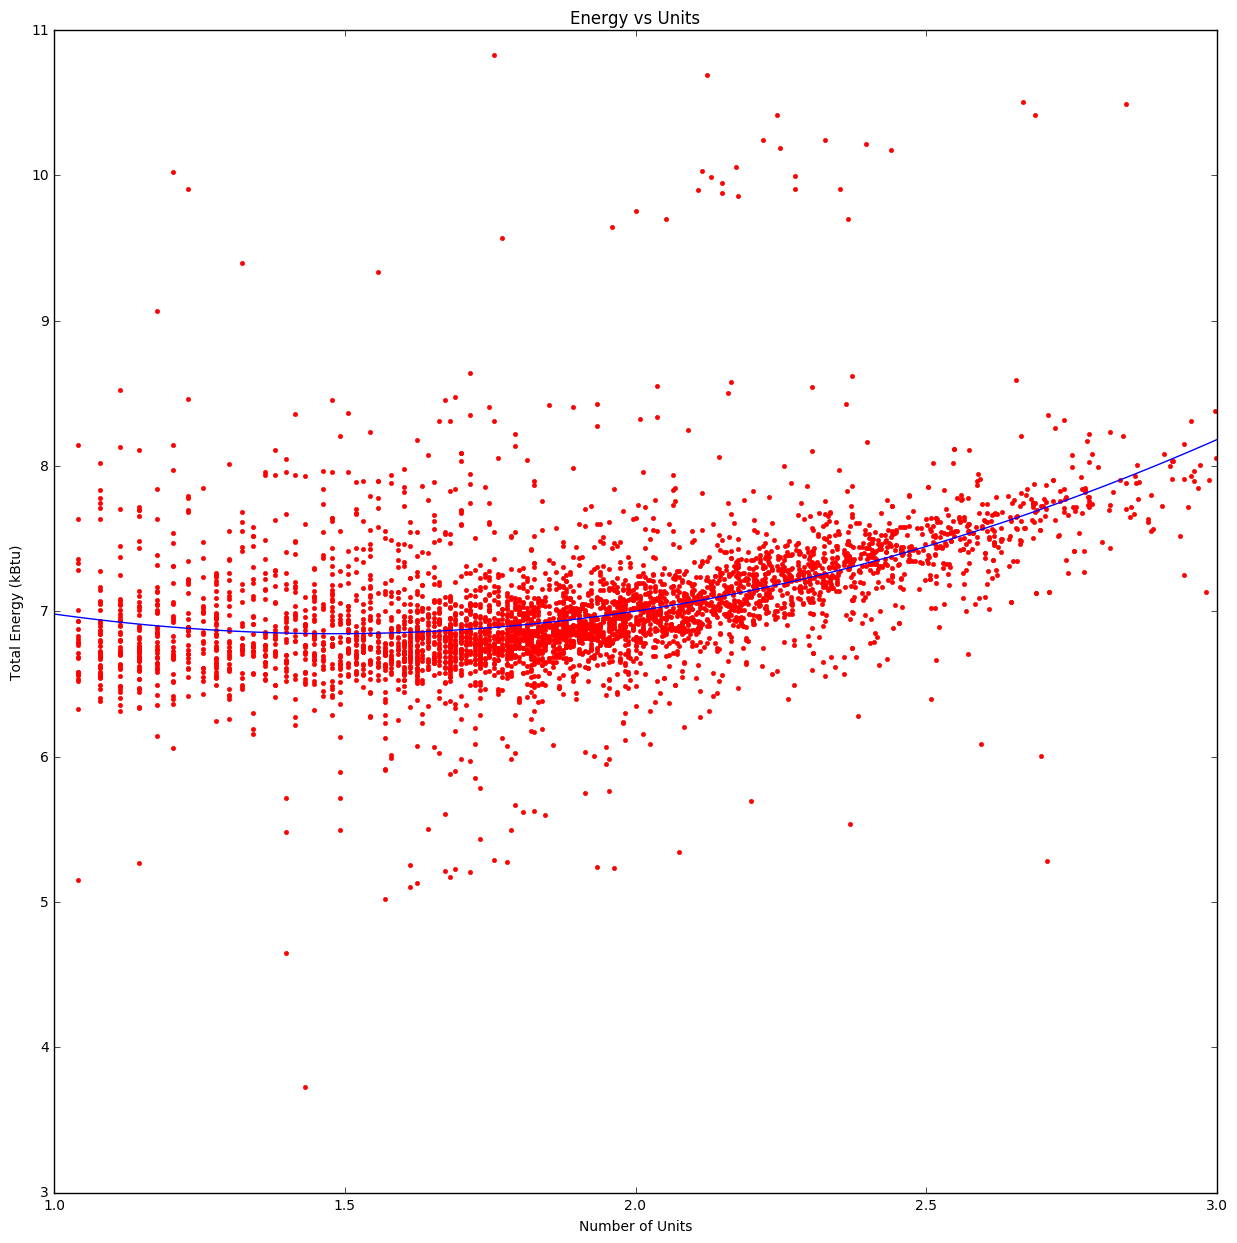

In [105]:
plt.figure(figsize=(15,15))
pl.plot(np.log10(bblnrgdata['UnitsTotal']), np.log10(bblnrgdata['etotal']), 'r.')
plt.plot(xp, fit(xp))
plt.ylabel("Total Energy (kBtu)")
plt.xlabel("Number of Units")
plt.title("Energy vs Units")

### Caption:
The above figure shows the log plot of the number of units vs. total energy consumed, now with a best fit 2nd degree polynomial line. Each dot represents a building's data.

In [95]:
LR = -2 * (results_2.llf - fit)
print(LR)

[ 5065.54479353  5060.94521654  5080.62641665]


In [112]:
print ("LR : ", -2 * (-results_2.llf - (-fit)))
print ("LR from statsmodels:", results_2.compare_lr_test(results_2))

LR :  [-5065.54479353 -5060.94521654 -5080.62641665]
LR from statsmodels: (-0.0, nan, 0.0)


## Interpretation:
What the above did was compare whether the linear model or the polynomial model was a best fit for the plot of number of units vs. total energy consumed. This takes into account the preference towards simpler functions (which would be linear in this case). Here, the log likelihood is a large negative value (about -5000). Since the log likelihood is the likelihood that the first model (linear) is a better fit than the second (polynomial), we can conclude that the polynomial model is a better fit of this data.